In [1]:
import pandas as pd
import fastai
from fastai.text import TextList, TokenizeProcessor, NumericalizeProcessor, TextLMDataBunch, language_model_learner
from fastai.datasets import URLs
from fastai.text import AWD_LSTM

%matplotlib inline

In [2]:
df = pd.read_csv(".\data\inspirational_final.csv")

### Some quotes don't have any likes and some are not in eglish, lets remove those

In [3]:
df = df[df.likes > 0][["quotes", "likes"]]

In [4]:
# not a good method i know but i can get rid of the quotes written in different alphabets
df["english"] = df.quotes.apply(lambda x: 1 if "a" in x or "e" in x else 0)

In [5]:
df = df[df.english == 1][["quotes", "likes"]]

In [6]:
data_lm = (TextList.from_df(df, processor=[TokenizeProcessor(), NumericalizeProcessor(max_vocab=60000, min_freq=5)])
            .random_split_by_pct(0.2)
            .label_for_lm()           
            .databunch(bs=32))

In [ ]:
data_lm.save()

In [ ]:
data_lm = TextLMDataBunch.load(".\\", bs=32)

In [7]:
learn = language_model_learner(data_lm, pretrained=True, drop_mult=0.3, arch= AWD_LSTM)

In [12]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


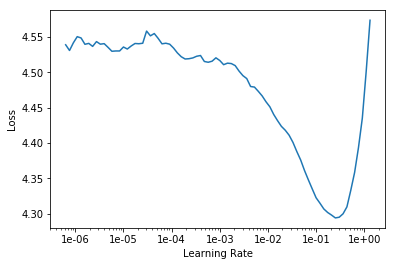

In [13]:
learn.recorder.plot(skip_end=10)

In [14]:
learn.fit_one_cycle(1, 1e-01, moms=(0.8,0.7))

epoch,train_loss,valid_loss,accuracy
1,4.003921,3.695524,0.301696


In [15]:
learn.fit_one_cycle(1, 1e-01, moms=(0.8,0.7))

epoch,train_loss,valid_loss,accuracy
1,3.948072,3.745145,0.294923


In [16]:
learn.unfreeze()

In [17]:
learn.fit_one_cycle(4, 1e-02, moms=(0.8,0.7))

epoch,train_loss,valid_loss,accuracy
1,3.537857,3.533105,0.318712
2,3.327848,3.362781,0.349426
3,2.850161,3.234516,0.382806
4,2.176483,3.317116,0.389847


In [22]:
learn.fit_one_cycle(1, 1e-02, moms=(0.8,0.7))

epoch,train_loss,valid_loss,accuracy
1,2.442904,3.294745,0.387474


In [21]:
learn.export('trained_model_quotes2.pkl')

In [26]:
print("\n".join(str(i+1) + "- " + learn.predict("be strong", 20, temperature=0.8, no_unk=True) for i in range(5)))

1- be strong , Having the best within you is God 's Word . ” xxbos “ God takes
2- be strong enough to bear the lessons that come if you learn to love yourself . ” xxbos “ And the
3- be strong , but never being a part of a person 's opinion . ” xxbos “ The road to success
4- be strong . Gods , knowing that you have doubters , are like you may be known to some kind of
5- be strong and powerful . Some of us are going to have the right to be a part of the first


In [27]:
print("\n".join(str(i+1) + "- " + learn.predict("xxbos ", 20, temperature=0.8, no_unk=True) for i in range(5)))

1- xxbos  “ There is no such thing as a good man . He can not be good enough to
2- xxbos  It ’s time to start , experience and blow high .. ” xxbos “ The only advice in
3- xxbos  “ We all pay for the sake of the future , the future shows without the same decision that
4- xxbos  “ Instead of worrying about what could go wrong , change your thoughts to what could go right .
5- xxbos  Some people never know they 're not , they do n't know . They 're going to find


In [ ]:
\

In [19]:
print("\n".join(str(i+1) + "- " + learn.predict("life is", 15, temperature=0.9, no_unk=True) for i in range(5)))

1- life is a huge ocean , it are because of it ' than the fact of man
2- life is a gift . Do , ever ever give up , never stop trying ,
3- life is a hero in the world , not in something to be discovered ; in changing
4- life is known , when you want to live a happier life , but to abandon yourself
5- life is not a miracle . It is a passing thing ; it is the inevitable
